### Change the epoch and prompt_type logic when generating results for eval on train set. Also change the range of e to (11,16)

In [8]:
import pandas as pd

results=[]

# TODO: lr for lora needs to be fixed

# model_type=['pretrained','instruct-tuned']

model_type=['pretrained']
lrs=['1e-5','3e-5']
finetuning=['FFT','LoRA']
bs=[16,32,64]
i=33

for model in model_type:
    for lr in lrs:
        for ft in finetuning:
            for size in bs:
                epoch=1
                for e in range(1,25):
                    df= pd.read_json(f'../outputs/exp-1.{i}/eval_{e}/generated_outputs.json')
                    # assert df.shape[0]==5473
                    score = df['score'].sum()/df.shape[0]
                    data= 'test' if e<17 else 'train'
                    if data=='test':
                        prompt_type= '0-shot' if e%2!=0 else '8-shot'
                        epochs=e//2+e%2
                    else:
                        prompt_type = '0-shot'
                        epochs=epoch
                        epoch+=1
                    if ft=='LoRA':
                        lr= '5e-5' if lr=='1e-5' else '1e-4'
                    results.append({
                        'exp_id':f'exp-1.{i}',
                        'model_type':model,
                        'data':data,
                        'lr':lr,
                        'finetuning_type':ft,
                        'bs':size,
                        'epoch':epochs,
                        'prompt_type':prompt_type,
                        'score':score
                    })
                    
                i+=1
                        
                

In [9]:
df=pd.DataFrame(results)

In [10]:
df

,exp_id,model_type,data,lr,finetuning_type,bs,epoch,prompt_type,score
0,exp-1.33,pretrained,test,1e-5,FFT,16,1,0-shot,0.322972
1,exp-1.33,pretrained,test,1e-5,FFT,16,1,8-shot,0.316907
2,exp-1.33,pretrained,test,1e-5,FFT,16,2,0-shot,0.390447
3,exp-1.33,pretrained,test,1e-5,FFT,16,2,8-shot,0.360121
4,exp-1.33,pretrained,test,1e-5,FFT,16,3,0-shot,0.409401
...,...,...,...,...,...,...,...,...,...
283,exp-1.44,pretrained,train,1e-4,LoRA,64,4,0-shot,0.517084
284,exp-1.44,pretrained,train,1e-4,LoRA,64,5,0-shot,0.540289
285,exp-1.44,pretrained,train,1e-4,LoRA,64,6,0-shot,0.547597
286,exp-1.44,pretrained,train,1e-4,LoRA,64,7,0-shot,0.558012


In [52]:
# # Find best score for each unique combination of model_type, lr, finetuning_type, bs, prompt_type
# best_scores = df.groupby(['model_type',  'finetuning_type',  'prompt_type'])['score'].max()



In [53]:
# best_scores

In [15]:
# Get the index of the best score for each group
best_score_indices = df[df['data']=='test'].groupby(['model_type',  'finetuning_type',  'prompt_type'])['score'].idxmax()

# Retrieve rows while keeping original index
best_scores = df.loc[best_score_indices]

In [16]:
best_scores

,exp_id,model_type,data,lr,finetuning_type,bs,epoch,prompt_type,score
146,exp-1.39,pretrained,test,3e-5,FFT,16,2,0-shot,0.463988
151,exp-1.39,pretrained,test,3e-5,FFT,16,4,8-shot,0.446550
248,exp-1.43,pretrained,test,1e-4,LoRA,32,5,0-shot,0.453374
221,exp-1.42,pretrained,test,1e-4,LoRA,16,3,8-shot,0.435178


In [17]:
# Get the index of the best score for each group
best_score_indices = df[df['data']=='train'].groupby(['model_type',  'finetuning_type',  'prompt_type'])['score'].idxmax()

# Retrieve rows while keeping original index
best_scores = df.loc[best_score_indices]

In [18]:
best_scores

,exp_id,model_type,data,lr,finetuning_type,bs,epoch,prompt_type,score
165,exp-1.39,pretrained,train,3e-5,FFT,16,6,0-shot,0.782204
239,exp-1.42,pretrained,train,1e-4,LoRA,16,8,0-shot,0.711310


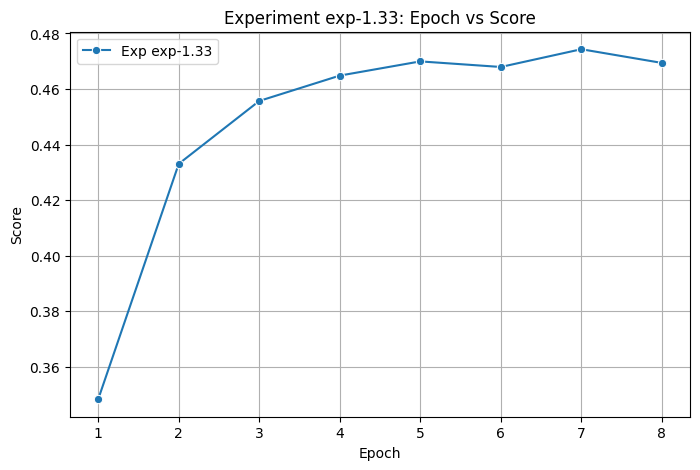

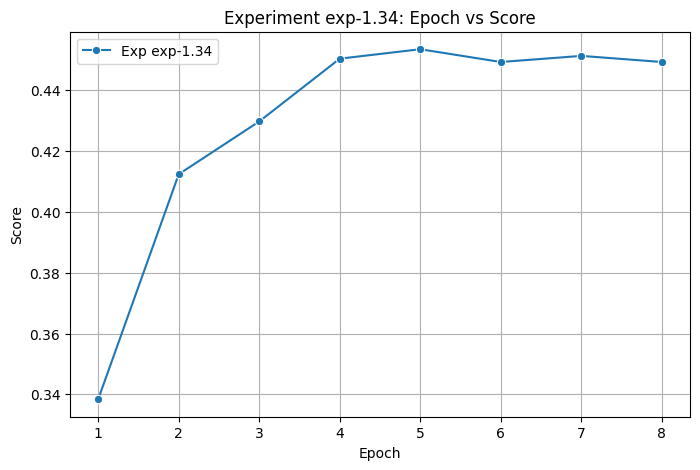

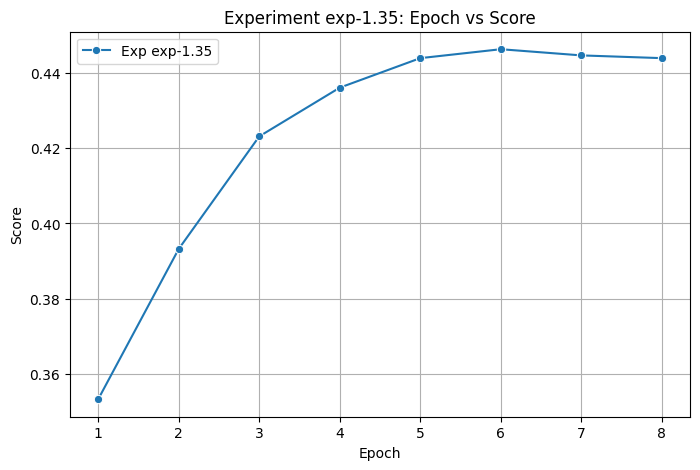

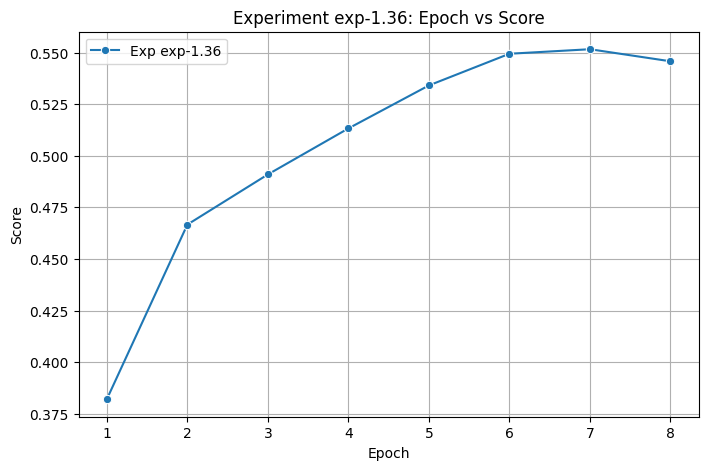

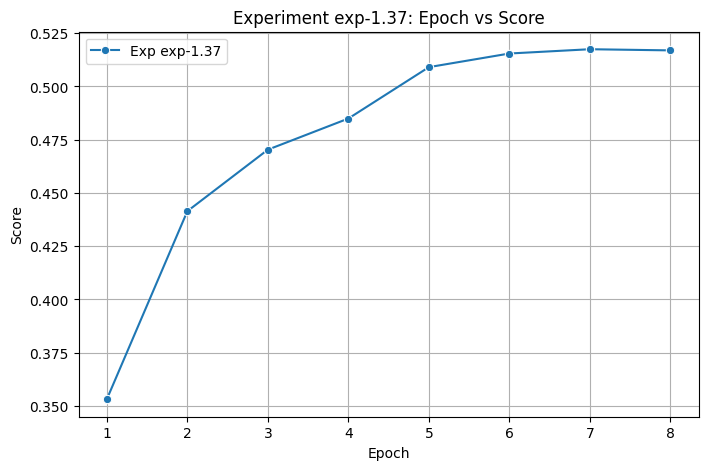

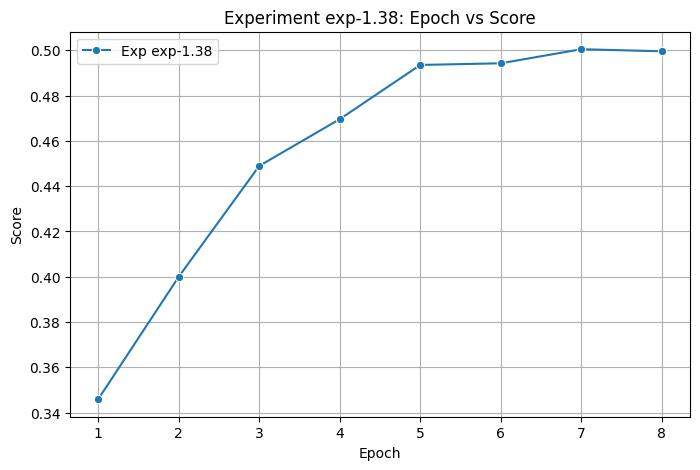

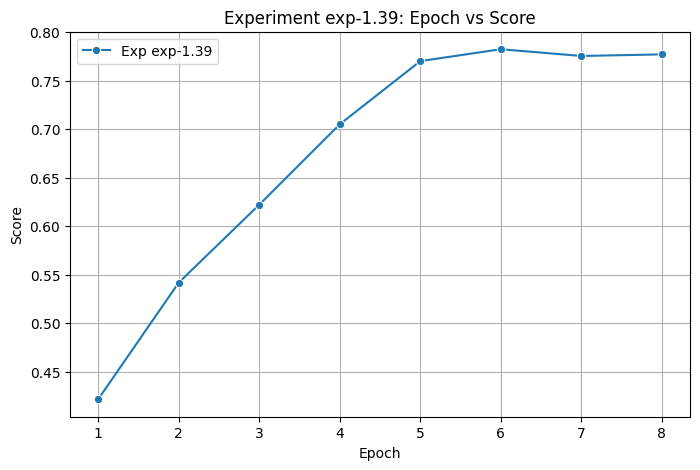

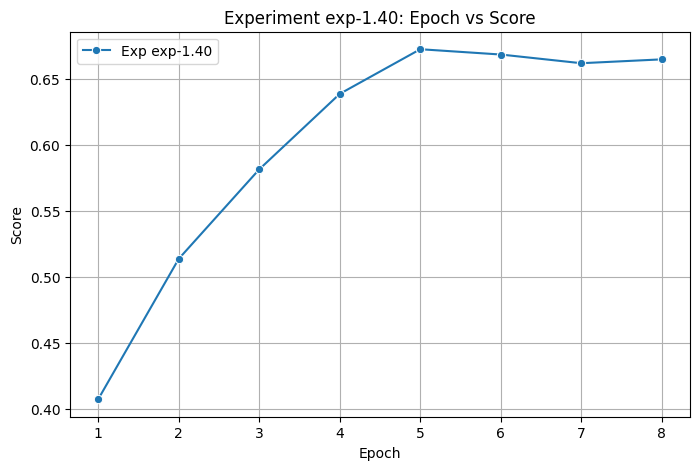

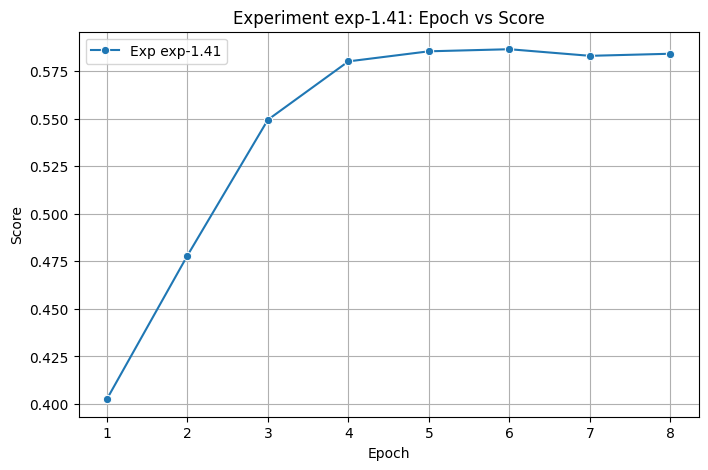

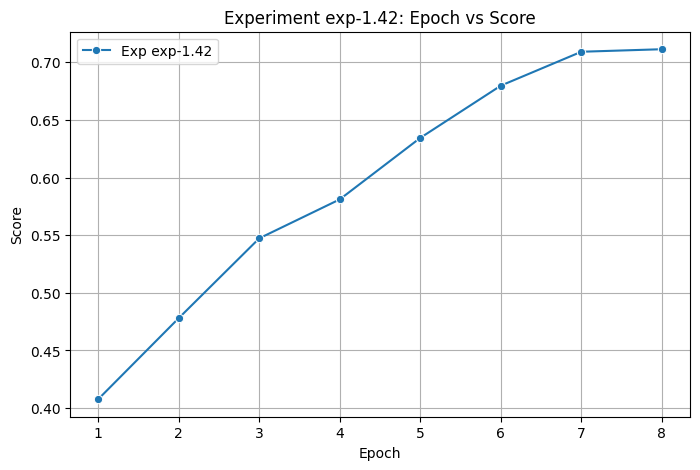

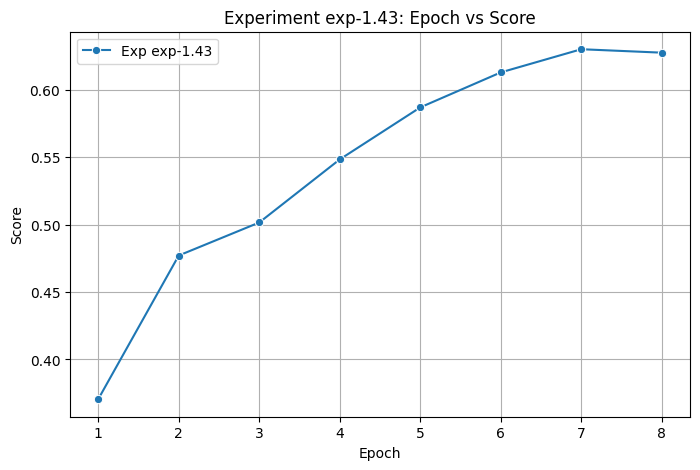

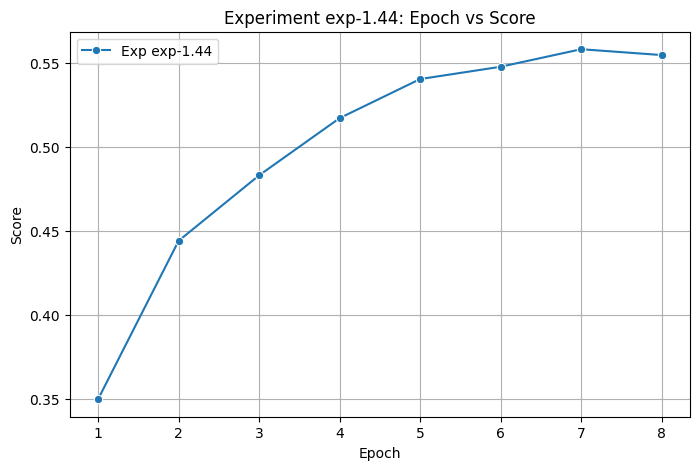

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df=df[df['data']=='train']

# Get unique exp_ids
unique_exp_ids = df['exp_id'].unique()

# Create a separate plot for each exp_id
for exp_id in unique_exp_ids:
    plt.figure(figsize=(8, 5))
    
    # Filter data for current exp_id
    subset = df[df['exp_id'] == exp_id]
    
    # Plot line graph
    sns.lineplot(data=subset, x='epoch', y='score', marker='o', label=f'Exp {exp_id}')
    
    # Formatting
    plt.title(f'Experiment {exp_id}: Epoch vs Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.xticks(subset['epoch'].unique())  # Ensures only valid epochs appear on x-axis
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()